In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import cooler
import cooltools.lib.plotting
from matplotlib.colors import LogNorm
import re 
from matplotlib.ticker import EngFormatter

In [113]:
batch1 = "Hi_C_cool/Batch1_C.Halisarca.mapq_30.1000.mcool"
batch2 = "Hi_C_cool/Batch2_A.Halisarca.mapq_30.1000.mcool"
batch3 = "Hi_C_cool/Batch3_T.Halisarca.mapq_30.1000.mcool"

In [54]:
col_path_list = cooler.fileops.list_coolers(f'{batch1}')
col_path_list

['/resolutions/1000',
 '/resolutions/2000',
 '/resolutions/5000',
 '/resolutions/10000',
 '/resolutions/25000',
 '/resolutions/50000',
 '/resolutions/100000',
 '/resolutions/250000',
 '/resolutions/500000']

In [125]:
def getClrList(batch_path):
    col_path_list = cooler.fileops.list_coolers(f'{batch_path}')
    clr_list = { i : cooler.Cooler(f'{batch_path}::{i}') for i in col_path_list }
    return clr_list
clr_list = { i : cooler.Cooler(f'{batch1}::{i}') for i in col_path_list }

In [75]:
clr = cooler.Cooler(f'{batch1}::resolutions/100000')

In [79]:
#chromstarts = []
#for i in clr.chromnames:
#    print(f'{i} : {clr.extent(i)}')
#    chromstarts.append(clr.extent(i)[0])
#chromstarts

def getChrNames(clr):
    chr_list = [ "s"+ re.match( r'PGA_scaffold_(\d*)_' , i).group(1) for i in clr.chromnames]
    chr_n_list = [  re.match( r'PGA_scaffold_(\d*)_' , i).group(1) for i in clr.chromnames]
    return chr_list,chr_n_list

def chrStats(clr):
    return [clr.extent(i)[0] for i in clr.chromnames] 



In [141]:
for i in clr.chromnames:
    print(f'{i} : {clr.extent(i)}')

PGA_scaffold_1__102_contigs__length_14045080 : (0, 141)
PGA_scaffold_2__63_contigs__length_8898131 : (141, 230)
PGA_scaffold_3__60_contigs__length_8969889 : (230, 320)
PGA_scaffold_4__30_contigs__length_8472333 : (320, 405)
PGA_scaffold_5__59_contigs__length_8893302 : (405, 494)
PGA_scaffold_6__60_contigs__length_7744515 : (494, 572)
PGA_scaffold_7__37_contigs__length_8462652 : (572, 657)
PGA_scaffold_8__172_contigs__length_9890528 : (657, 756)
PGA_scaffold_9__91_contigs__length_7523824 : (756, 832)
PGA_scaffold_10__84_contigs__length_7978024 : (832, 912)
PGA_scaffold_11__49_contigs__length_7340081 : (912, 986)
PGA_scaffold_12__78_contigs__length_12288597 : (986, 1109)
PGA_scaffold_13__90_contigs__length_9659150 : (1109, 1206)
PGA_scaffold_14__39_contigs__length_8868296 : (1206, 1295)
PGA_scaffold_15__59_contigs__length_10044358 : (1295, 1396)
PGA_scaffold_16__69_contigs__length_8398518 : (1396, 1480)
PGA_scaffold_17__113_contigs__length_8702656 : (1480, 1568)
PGA_scaffold_18__196_cont

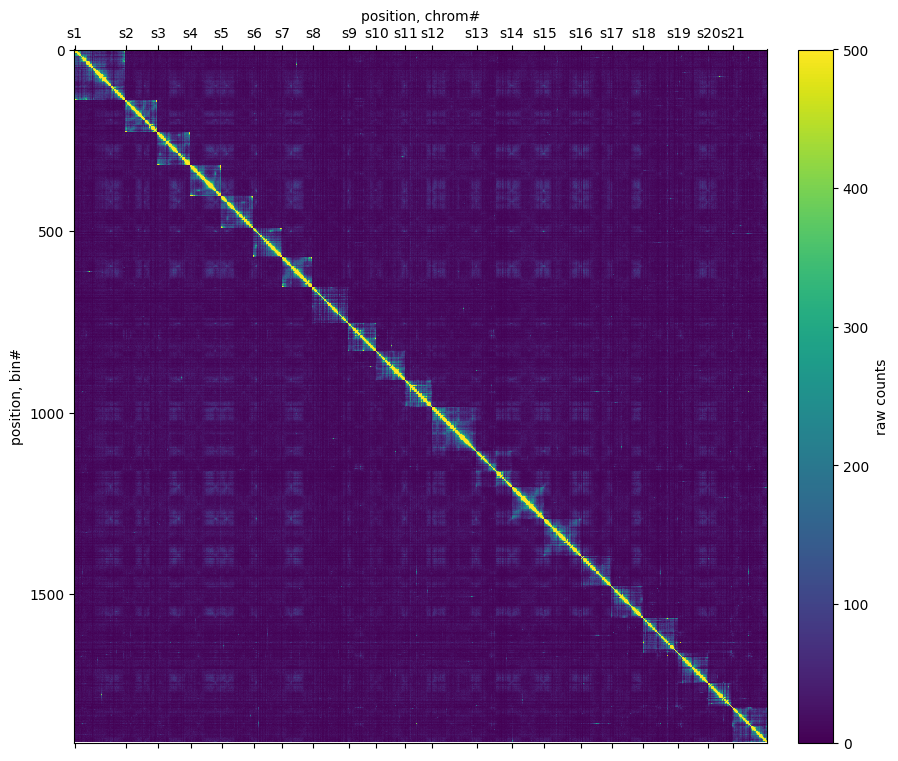

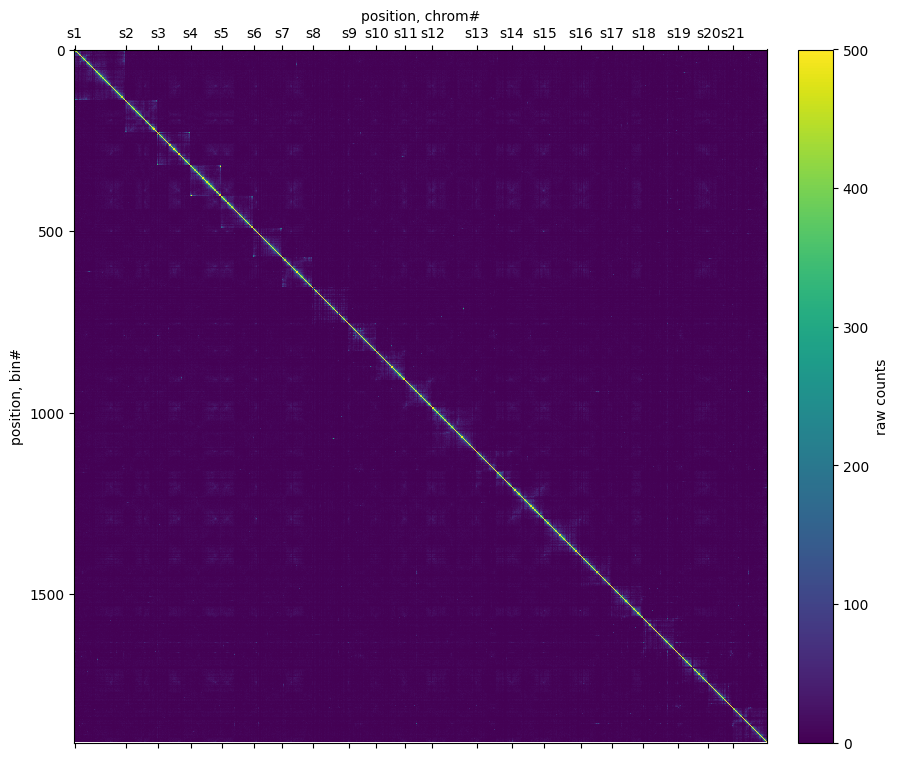

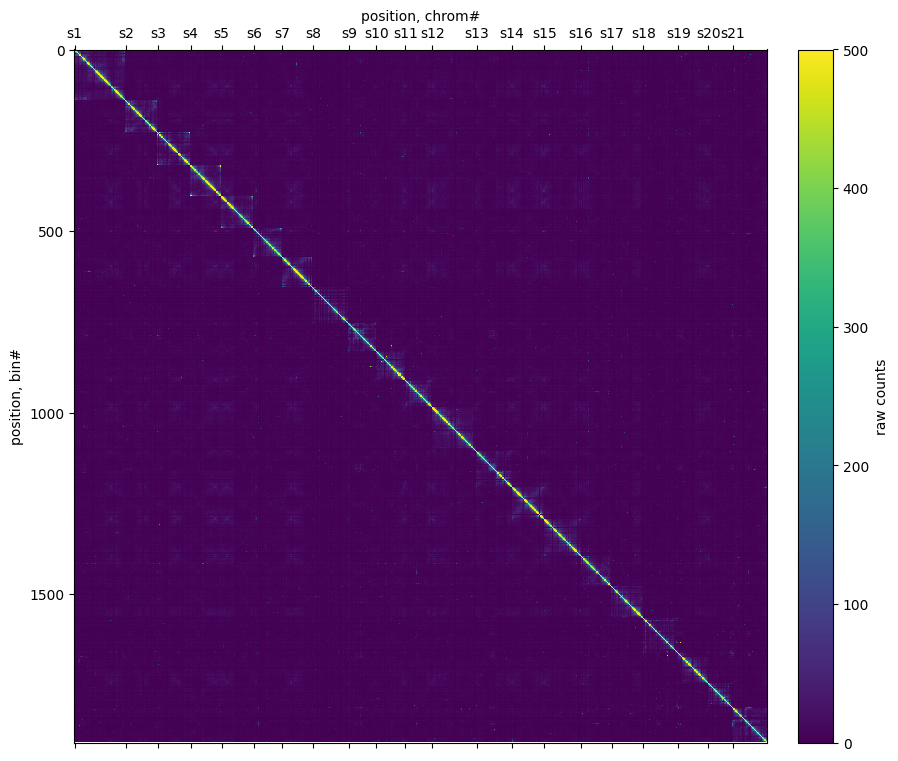

In [135]:
getClrList(batch1)
def plotAll(clr_list):
    clr = clr_list["/resolutions/100000"]

    chr_list, chr_n_list = getChrNames(clr)

    f, ax = plt.subplots( figsize=(10,9))
    im = ax.matshow((clr.matrix(balance=False)[:]),vmax=500)
    plt.colorbar(im ,fraction=0.046, pad=0.04, label='raw counts')


    chromstarts = chrStats(clr)
    ax.set(xticks=chromstarts, xticklabels=chr_list, xlabel='position, chrom#', ylabel='position, bin#')
    ax.xaxis.set_label_position('top')
    return clr.matrix(balance=False)[:]
matrix_C= plotAll(getClrList(batch1))
plotAll(getClrList(batch2))
matrix_T= plotAll(getClrList(batch3))

In [390]:
chr = "PGA_scaffold_1__102_contigs__length_14045080" 
resol = 50000
clr__1= getClrList(batch1)[f"/resolutions/{resol}"]
clr__3= getClrList(batch3)[f"/resolutions/{resol}"]
matrix_C_1 = clr__1.matrix(balance=False).fetch(chr)
matrix_T_1 = clr__3.matrix(balance=False).fetch(chr)


/tmp/ipykernel_26771/3989868127.py:2: RuntimeWarning: divide by zero encountered in divide
  im = ax.matshow((matrix_C_1/matrix_T_1),vmax=30,vmin=0)
/tmp/ipykernel_26771/3989868127.py:2: RuntimeWarning: invalid value encountered in divide
  im = ax.matshow((matrix_C_1/matrix_T_1),vmax=30,vmin=0)


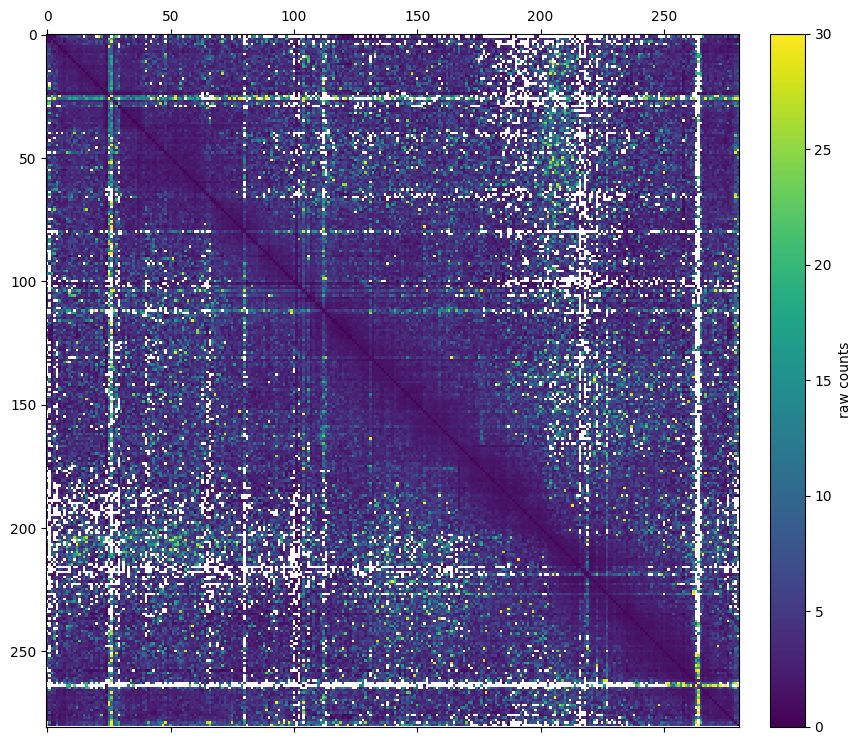

In [391]:
f, ax = plt.subplots( figsize=(10,9))
im = ax.matshow((matrix_C_1/matrix_T_1),vmax=30,vmin=0)
plt.colorbar(im ,fraction=0.046, pad=0.04, label='raw counts')

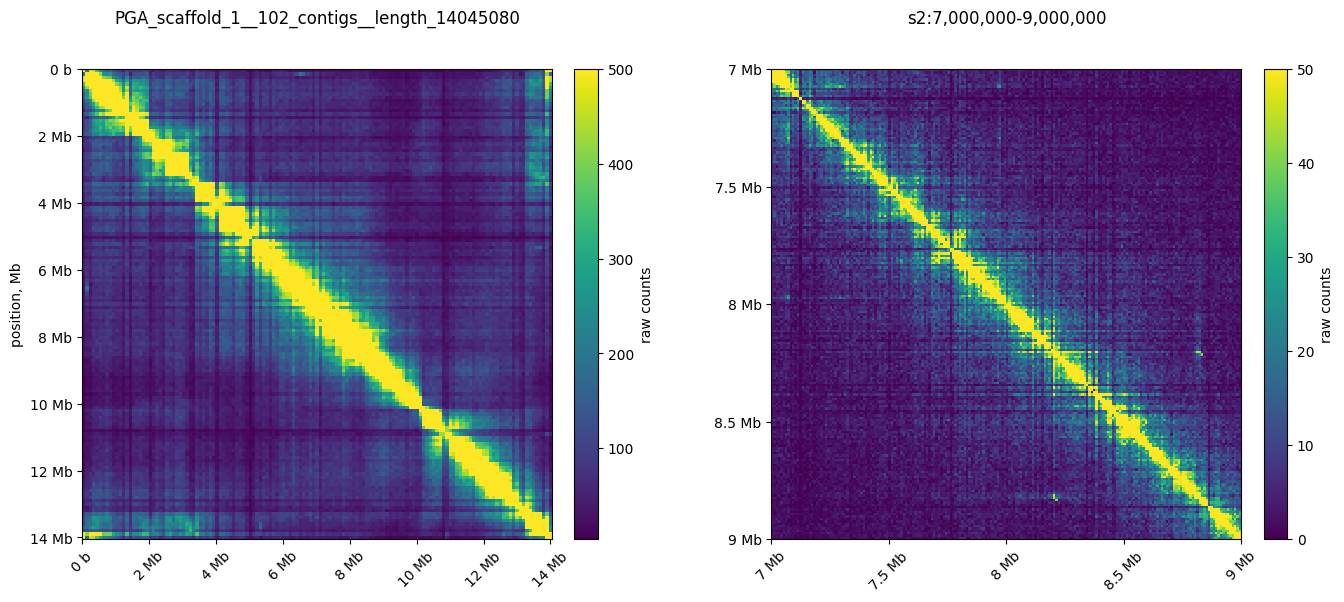

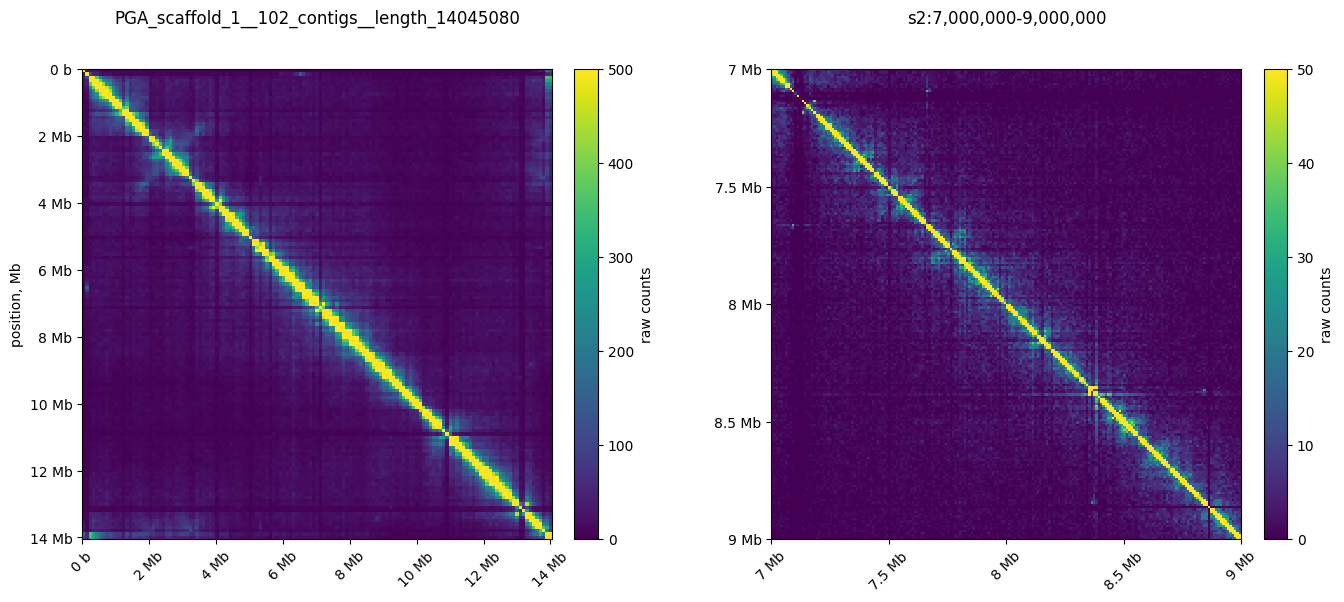

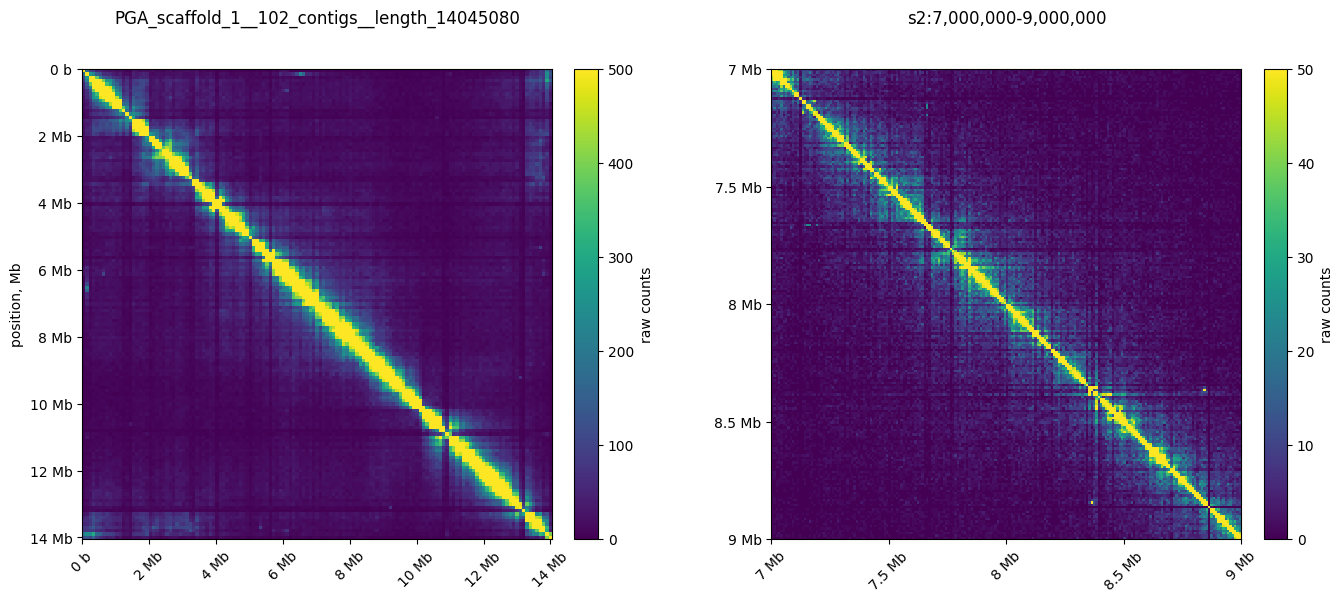

In [291]:

def print_zoom(clr_list_ , chr, fron_to = (7_000_000, 8_500_000), resol1 =100000, resol2 = 50000, scale=1):

    #vmax = (resol1/4500)**2
    #vmax2 = (resol2/4500)**2
    vmax = (resol1/200)*scale
    vmax2 = (resol2/200)*scale

    bp_formatter = EngFormatter('b')

    def format_ticks(ax, x=True, y=True, rotate=True):
        if y:
            ax.yaxis.set_major_formatter(bp_formatter)
        if x:
            ax.xaxis.set_major_formatter(bp_formatter)
            ax.xaxis.tick_bottom()
        if rotate:
            ax.tick_params(axis='x',rotation=45)

    f, axs = plt.subplots(figsize=(14,6), ncols=2)

    clr_1 = clr_list_[f"/resolutions/{resol1}"]
    ax = axs[0]
    im = ax.matshow(
        clr_1.matrix(balance=False).fetch(chr),
        vmax=vmax,
        extent=(0,clr_1.chromsizes[chr], clr_1.chromsizes[chr], 0)
    )

    plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts')
    ax.set_title(chr, y=1.08)
    ax.set_ylabel('position, Mb')
    format_ticks(ax)


    clr_2 = clr_list_[f"/resolutions/{resol2}"]
    ax = axs[1]
    start, end = fron_to
    region = (chr, start, end)
    output_matrix = clr_2.matrix(balance=False).fetch(region)
    im = ax.matshow(
        output_matrix,
        vmax=vmax2,
        extent=(start, end, end, start)
    )
    ax.set_title(f's2:{start:,}-{end:,}', y=1.08)
    plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts')
    format_ticks(ax)
    plt.tight_layout()
    return output_matrix



 


cromosome_to_plot = 'PGA_scaffold_2__63_contigs__length_8898131'
cromosome_to_plot = 'PGA_scaffold_1__102_contigs__length_14045080'
reg = (7_000_000, 9_000_000)
resol1 =100000; resol2 = 10000
scale = 1.0

m1 = print_zoom(getClrList(batch1) ,cromosome_to_plot,fron_to = reg,  resol1 =resol1, resol2 = resol2 ,scale = scale)
m2 = print_zoom(getClrList(batch2) , cromosome_to_plot,fron_to =reg, resol1 =resol1, resol2 = resol2, scale = scale)
m3 =print_zoom(getClrList(batch3) , cromosome_to_plot,fron_to =reg, resol1 =resol1, resol2 = resol2, scale = scale)

In [365]:
import pandas as pd

#HD_07293-RA protein
#HD_11363-RA protein
#Atypical protein kinase C OS=Drosophila
#melanogaster
#Protein c-Fos OS=Rattus norvegicus
#HD_16538-RA protein
#Serine/threonine-protein kinase D1 OS=Homo
#sapiens
#HD_00647-RA protein
#cAMP-dependent protein kinase catalytic
#subunit alpha OS=Homo sapiens
#HD_03776-RA protein
#Sigma Aldrich 228 — Сегодня, в 18:28
#CREB_EMENI Ubiquitin carboxyl-terminal hydrolase creB
#OS=Emericella nidulans
#HD_00202-RA protein
#EPDR1_HUMAN Mammalian ependymin-related protein 1 OS=Homo
#sapiens
#HD_00678-RA protein
#WNT4_HUMAN Protein Wnt-4 OS=Homo sapiens
#HD_09296-RA protein
#D6WVZ1_TRICA Sodium-and chloride-dependent GABA
#transporter ine-like Protein OS=Tribolium castaneum
#HD_00943-RA protein

#"HD_01142-RA"
id_list = ["HD_07293-RA","HD_11363-RA","HD_16538-RA","HD_00647-RA","HD_03776-RA","HD_00678-RA","HD_00678-RA","HD_09296-RA","HD_00943-RA"]#,"HD_00202-RA"]

df = pd.read_csv("masurca235_21chr_annotUTR_mtx_final_filtered.gtf" ,delimiter="\t", header=None)

fdf = df[df[2]=="transcript"]

fdf = fdf[fdf[8].str.contains('|'.join(id_list))]
fdf


0      1           2        3        4  5  6  7  \
41040    HiC_scaffold_3  maker  transcript  5739092  5740561  .  -  .   
44936    HiC_scaffold_3  maker  transcript  1110587  1127919  .  +  .   
46986    HiC_scaffold_3  maker  transcript  3765771  3782592  .  +  .   
51063    HiC_scaffold_3      .  transcript  1355558  1360548  .  +  .   
68204    HiC_scaffold_4      .  transcript  6170919  6178861  .  -  .   
100174   HiC_scaffold_6      .  transcript  2411859  2427789  .  +  .   
238170  HiC_scaffold_12      .  transcript  5699736  5704929  .  -  .   
303717  HiC_scaffold_17      .  transcript  7641631  7650695  .  -  .   
325118  HiC_scaffold_18      .  transcript  2513058  2523500  .  +  .   

                                                        8  
41040   gene_id "nbis-gene-18998"; transcript_id "HD_1...  
44936   gene_id "nbis-gene-18522"; transcript_id "HD_0...  
46986   gene_id "nbis-gene-18821"; transcript_id "HD_0...  
51063   gene_id "nbis-gene-18553"; transcript_id "HD_0...  
68204   gene_id "nbis-gene-20485"; transcript_id "HD_0...  
100174  gene_id "nbis-gene-23050"; transcript_id "HD_0...  
238170  gene_id "nbis-gene-4533"; transcript_id "HD_09...  
303717  gene_id "nbis-gene-9519"; transcript_id "HD_11...  
325118  gene_id "nbis-gene-9941"; transcript_id "HD_03...

In [385]:
def print_cmp( chr_, from_to = (7_000_000, 8_500_000),resol = 50000, scale=1):

    vmax2 = (resol/200)*scale
    
    all_batches= [ getClrList(batch1), getClrList(batch2), getClrList(batch3)] 
    bp_formatter = EngFormatter('b')

    def format_ticks(ax, x=True, y=True, rotate=True):
        if y:
            ax.yaxis.set_major_formatter(bp_formatter)
        if x:
            ax.xaxis.set_major_formatter(bp_formatter)
            ax.xaxis.tick_bottom()
        if rotate:
            ax.tick_params(axis='x',rotation=45)

    f, axs = plt.subplots(figsize=(14,6), ncols=3)

    cnt = 0 
    for clr_list_ in all_batches:
        clr_2 = clr_list_[f"/resolutions/{resol}"]
        
        chr_idx = int(re.match( r'HiC_scaffold_(\d*)' , chr_).group(1))-1
        chr = clr.chromnames[chr_idx-1]

        ax = axs[cnt]
        start, end = from_to
        region = (chr, start, end)
        output_matrix = clr_2.matrix(balance=False).fetch(region)
        im = ax.matshow(
            output_matrix,
            vmax=vmax2,
            extent=(start, end, end, start)
        )
        ax.set_title(f'{chr}\n:{start:,}-{end:,}', y=1.08)
        plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts')
        format_ticks(ax)
        
        cnt+=1
    plt.tight_layout()
    plt.show()



gene_id "nbis-gene-18998"; transcript_id "HD_16538-RA"; Name "g2098.t1";


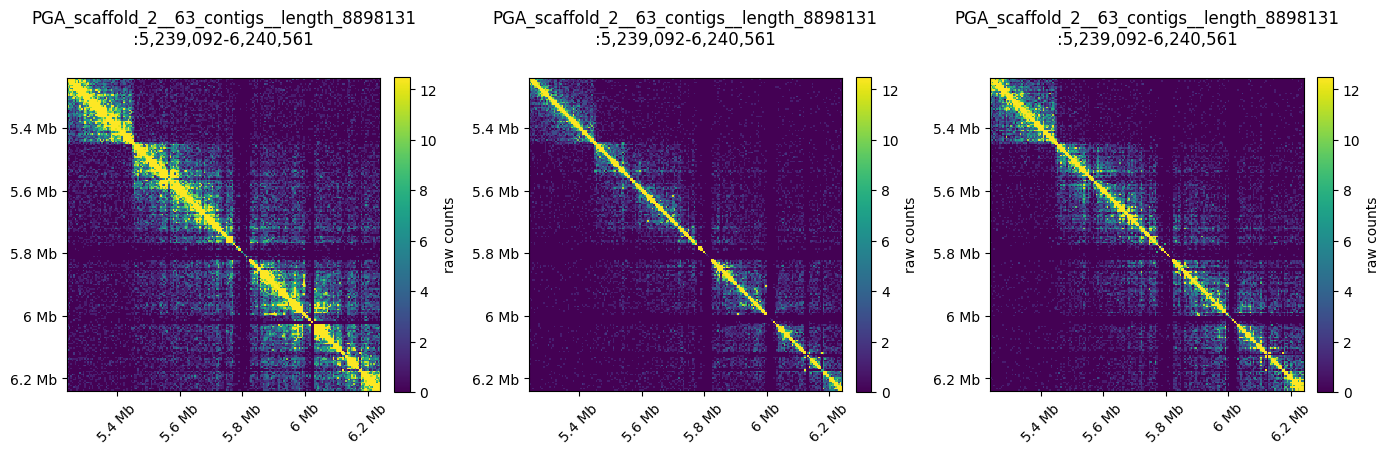

gene_id "nbis-gene-18522"; transcript_id "HD_00647-RA"; Name "g9651.t1";


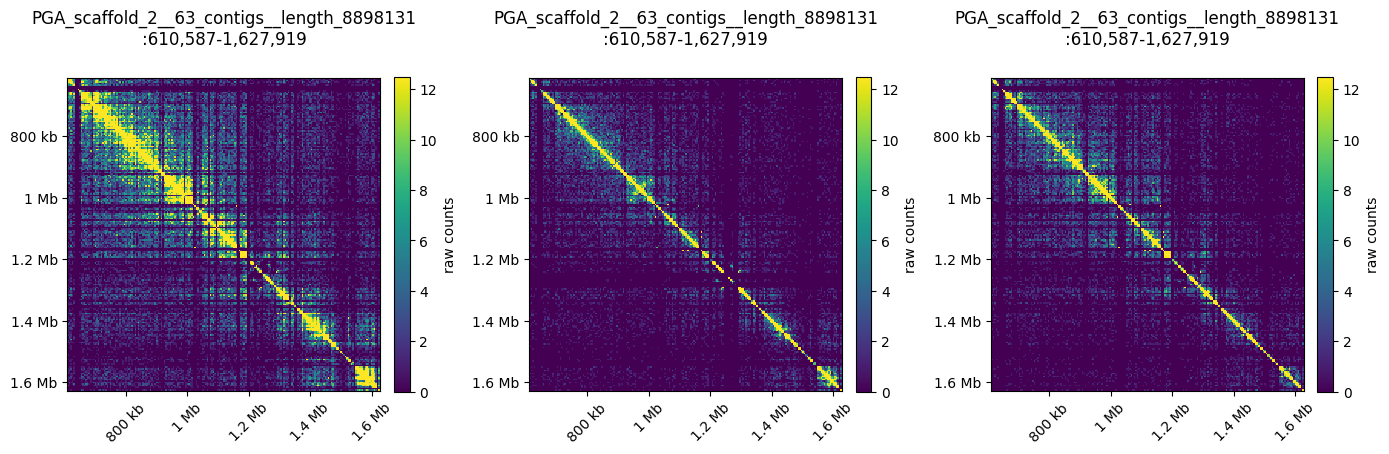

gene_id "nbis-gene-18821"; transcript_id "HD_01142-RA"; Name "g3220.t1";


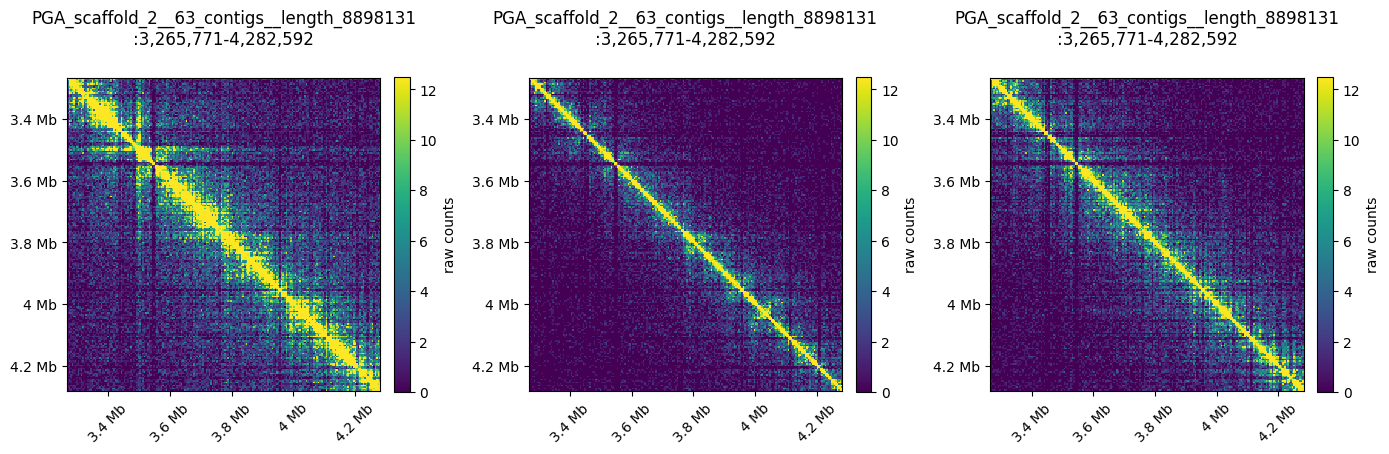

gene_id "nbis-gene-18553"; transcript_id "HD_00678-RA"; Name "g9683.t1";


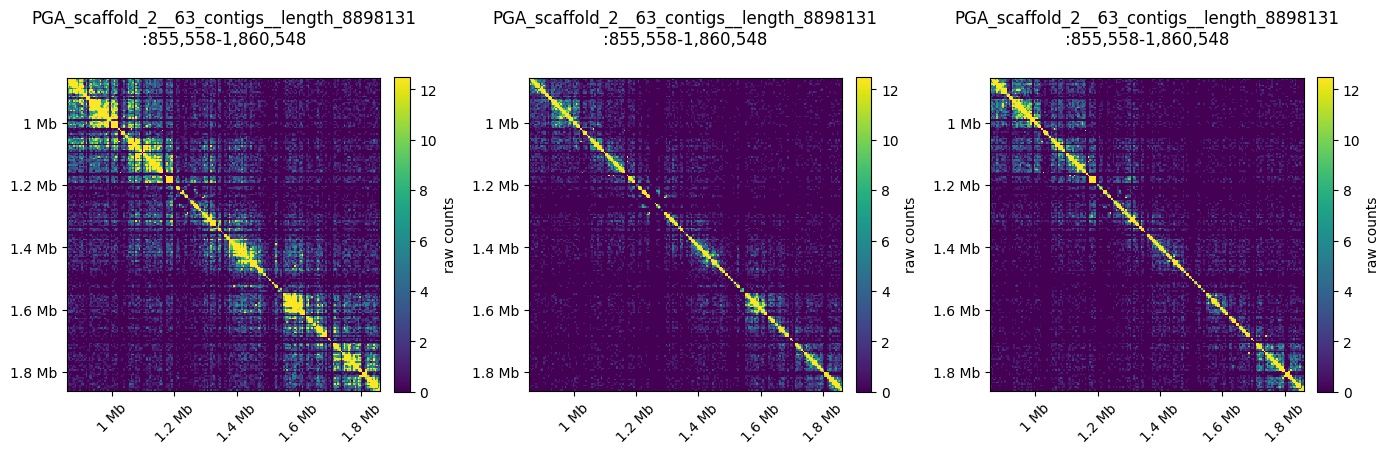

gene_id "nbis-gene-20485"; transcript_id "HD_00943-RA"; Name "g10172.t1";


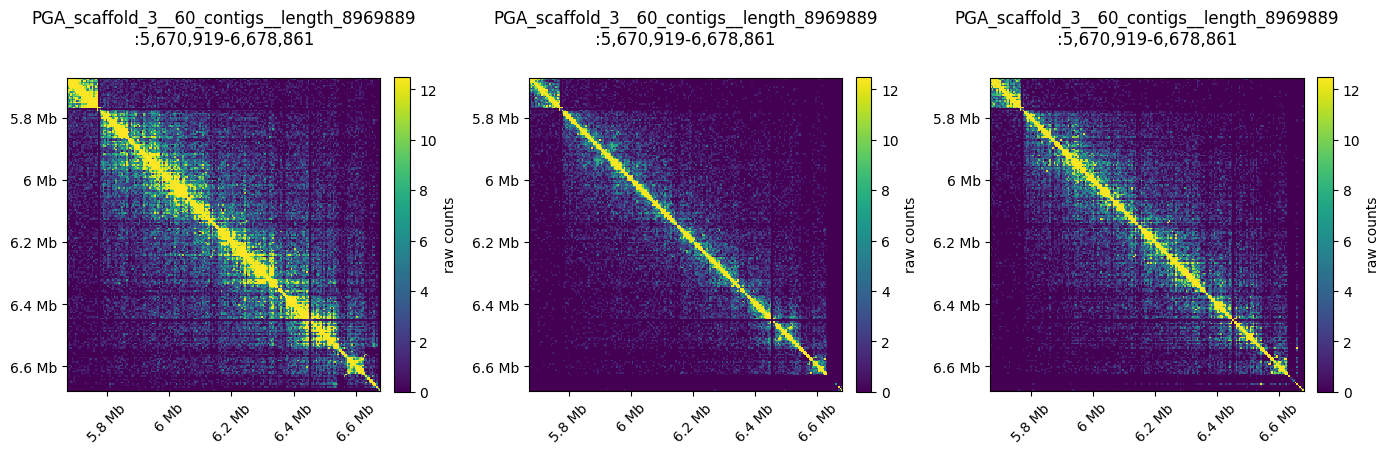

gene_id "nbis-gene-23050"; transcript_id "HD_07293-RA"; Name "g20325.t1";


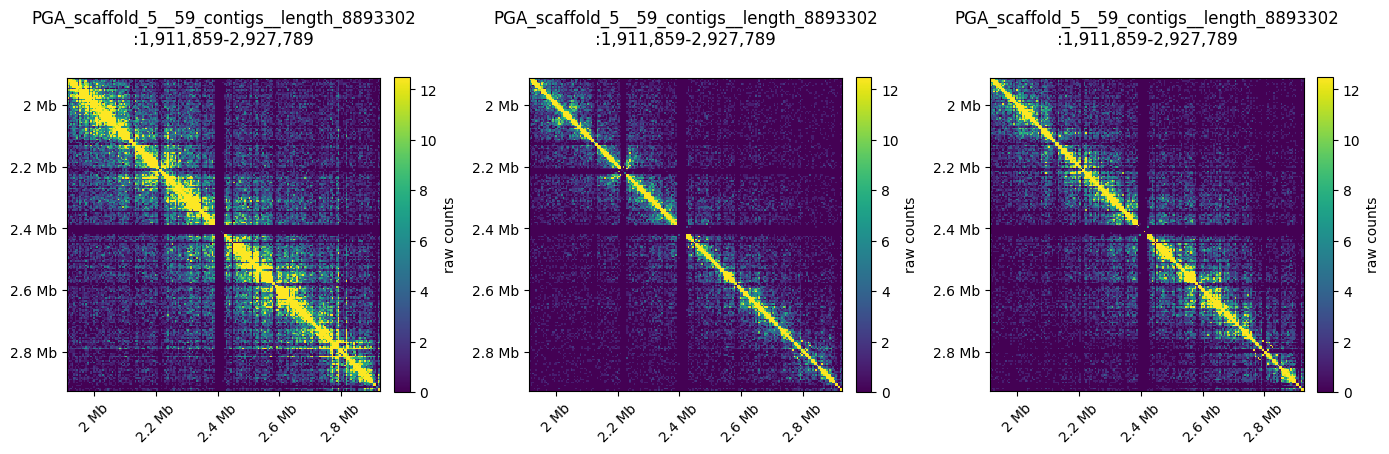

gene_id "nbis-gene-4533"; transcript_id "HD_09296-RA"; Name "g27792.t1";


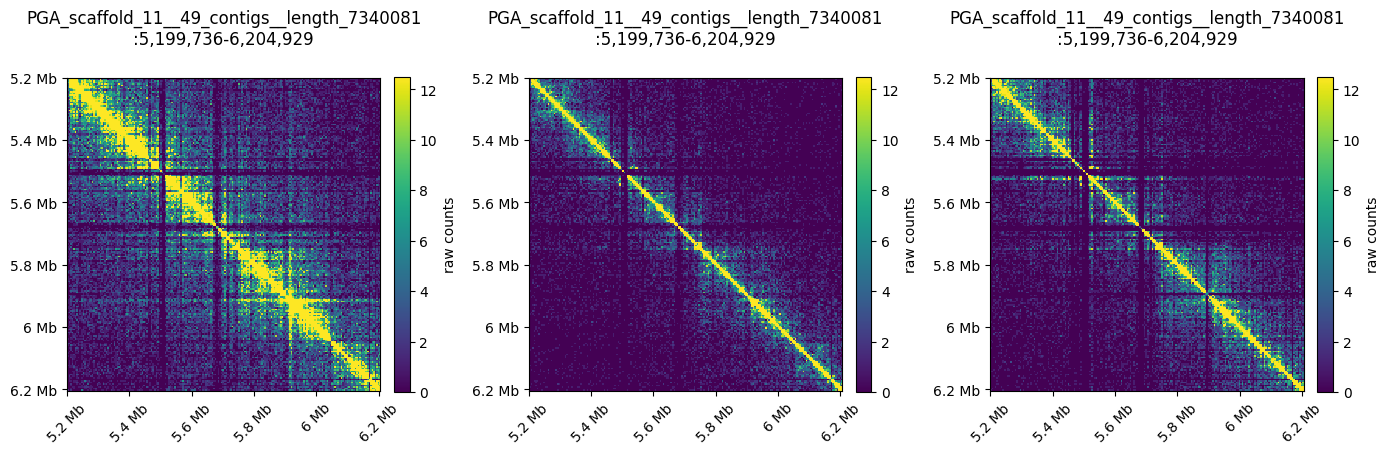

gene_id "nbis-gene-9519"; transcript_id "HD_11363-RA"; Name "g16379.t1";


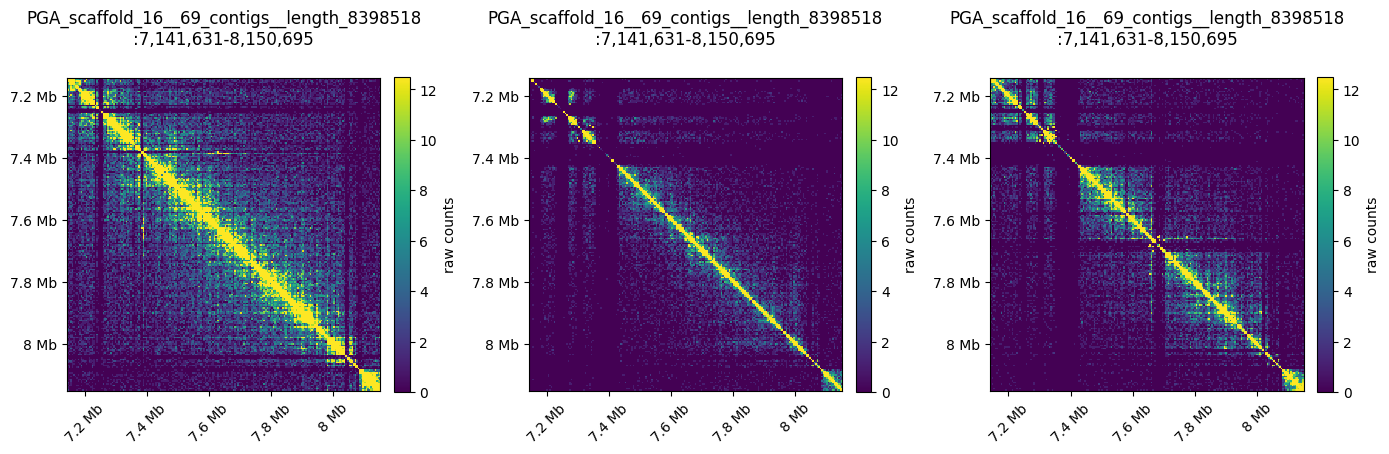

gene_id "nbis-gene-9941"; transcript_id "HD_03776-RA"; Name "g18971.t1";


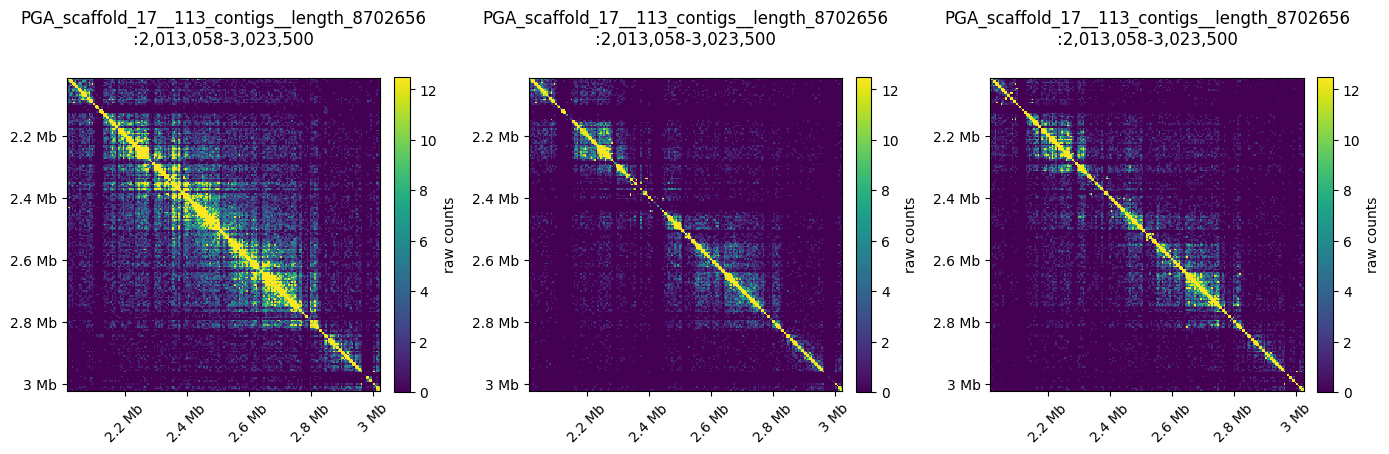

In [387]:
for index, row in fdf.iterrows():
    try:
        chr = row[0]
        print(row[8])
        diff = 1000 # row[4] - row[3]
        MUL = 500
        print_cmp( chr, from_to=(row[3]-diff*MUL, row[4]+diff*MUL), resol = 5000, scale=0.5)
    except:
        pass
    #print_cmp

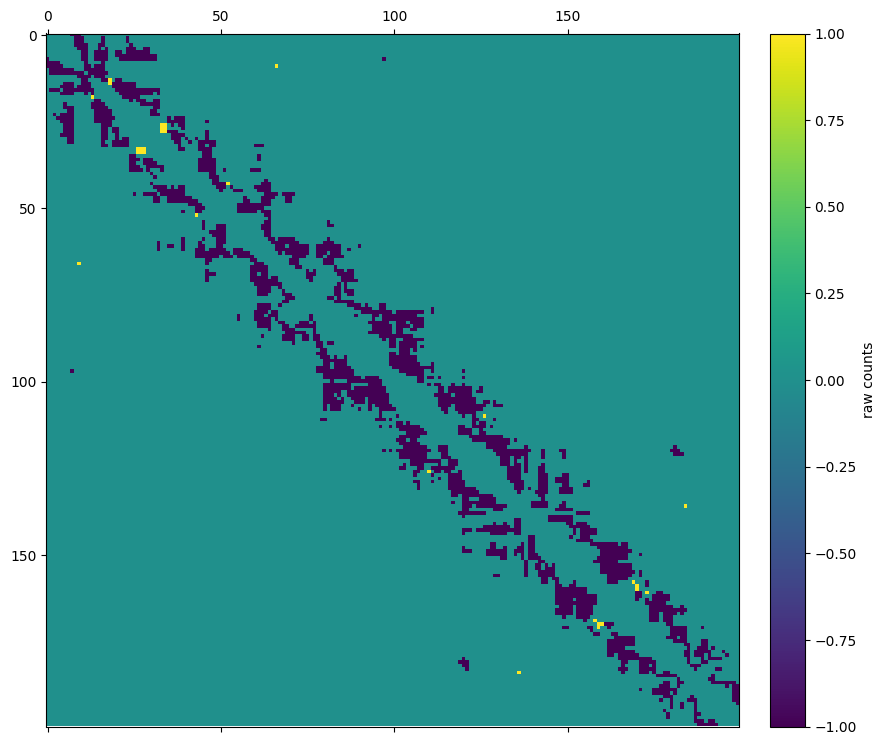

In [316]:
import scipy as sp
sigma = [0.7, 0.7]
m1_ = sp.ndimage.filters.gaussian_filter(m1, sigma, mode='constant')
m2_ = sp.ndimage.filters.gaussian_filter(m2, sigma, mode='constant')
m3_ = sp.ndimage.filters.gaussian_filter(m2, sigma, mode='constant')

div = (m2_>np.mean(m2_))*1. - (m1_>np.mean(m1_))*1.


f, ax = plt.subplots( figsize=(10,9))
im = ax.matshow((div))#,vmax=50,vmin=-50)
plt.colorbar(im ,fraction=0.046, pad=0.04, label='raw counts')